## So after training the model - which took almost 12 hours!, we can finally do inference on the test set

In [1]:
%cd yolov5

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5  v7.0-56-gc0ca1d21 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)


Setup complete  (20 CPUs, 15.7 GB RAM, 358.3/952.9 GB disk)


we are using the pre-trained model from [this notebook](https://www.kaggle.com/andy8744/beginner-train-a-yolov5-model)

Run inference

In [5]:
!python detect.py --weights runs/train/exp6_20k_kaggle/weights/best.pt --img 416 --conf 0.25 --source ../playing_cards/test/images

detect: weights=['runs/train/exp6_20k_kaggle/weights/best.pt'], source=../playing_cards/test/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-56-gc0ca1d21 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7150369 parameters, 0 gradients, 16.2 GFLOPs
image 1/2000 C:\Users\Thoma\Documents\Github\Project\playing_cards\test\images\000246247_jpg.rf.fb915aef7c063ce2ac971f8de0d8b2c1.jpg: 416x416 2 7cs, 1 8d, 1 As, 9.3ms
image 2/2000 C:\Users\Thoma\Documents\Github\Project\playing_cards\test\images\000355142_jpg.rf.7e5eff691d035112dd4b5021fe38a46c.jpg: 416

all detections can be found at ./runs/detect/exp



In [7]:
import os
inferred_test_imgs = os.listdir("./runs/detect/exp4")
inferred_test_imgs[:9]

['000246247_jpg.rf.fb915aef7c063ce2ac971f8de0d8b2c1.jpg',
 '000355142_jpg.rf.7e5eff691d035112dd4b5021fe38a46c.jpg',
 '001761433_jpg.rf.1a4a563beb6d588841bd8bd3a50c083b.jpg',
 '002629845_jpg.rf.305af0d0868b44b8b65df0cf920335d5.jpg',
 '003587783_jpg.rf.1fde5478718d17e883ce43a158a376cb.jpg',
 '003596029_jpg.rf.c27585a43dd8529ea9aa71e717c81957.jpg',
 '003787710_jpg.rf.fc4b9f3dd0d6f3146d70739ac741a64e.jpg',
 '003934748_jpg.rf.c014455990c8063a5cd90ad140ba1de3.jpg',
 '004598275_jpg.rf.65c5b0c5f5b311f21b97690253580759.jpg']

3x3 subplot of first 9 inferred image

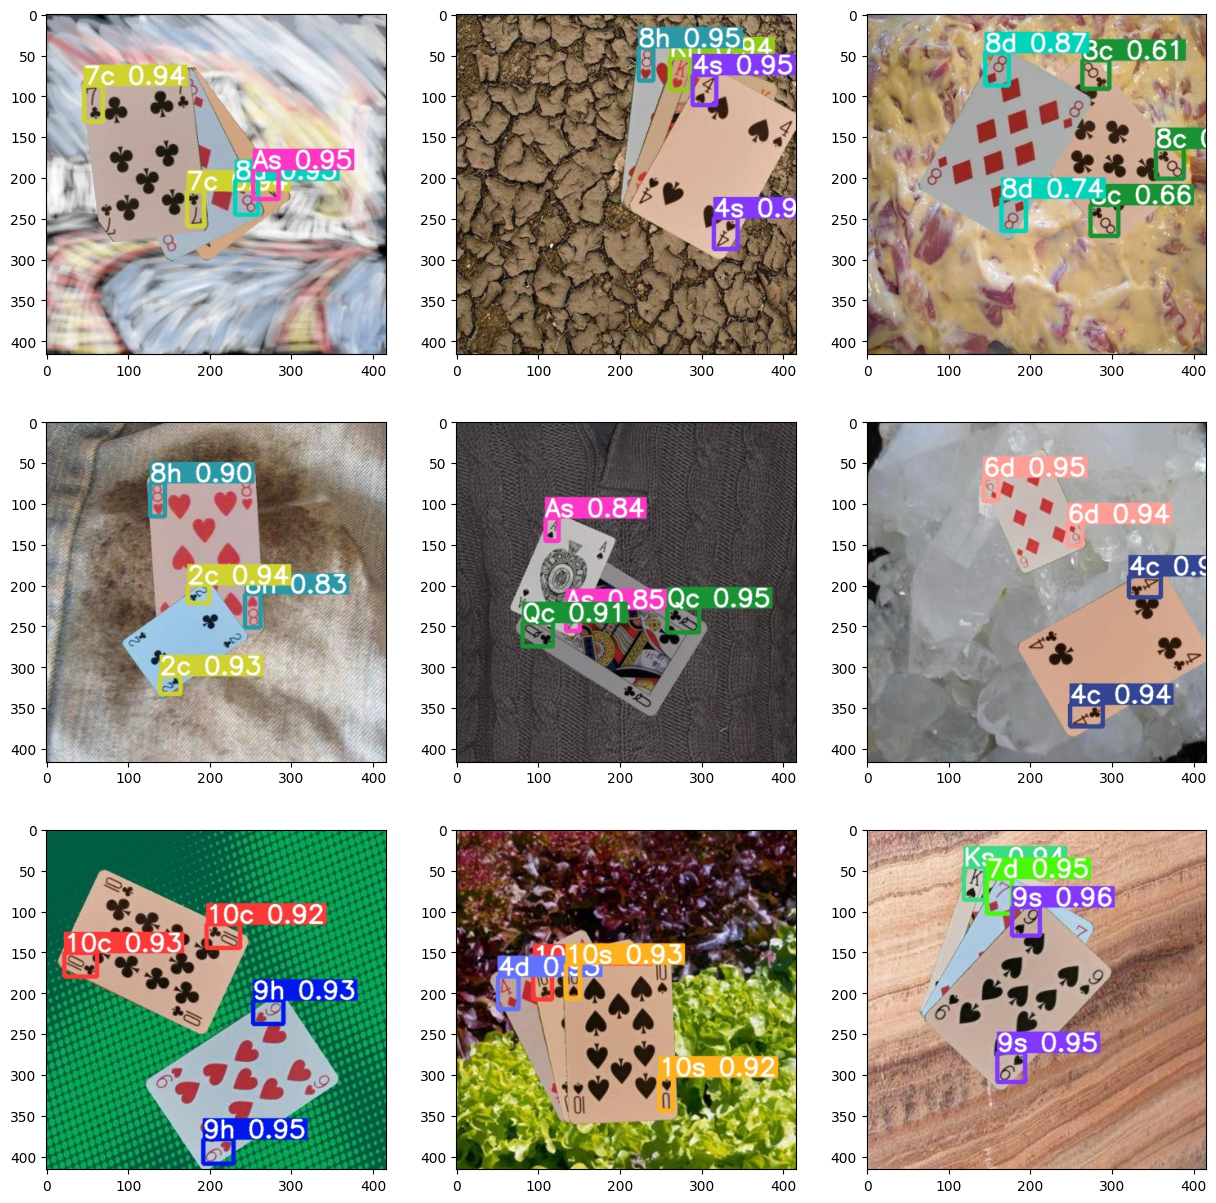

: 

In [9]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(15,15)) # specifying the overall grid size

for i, image in enumerate(inferred_test_imgs[:9]):
    filename = os.path.join("./runs/detect/exp4", image)
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3,3,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(img)

plt.show()